In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
from copy import deepcopy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scienceplots
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc

In [3]:
# l1/l2 term
params = [0.0, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

In [4]:
from config import configs
config = {}
config["spo"]  = configs["ks"]["spo"]
config["pfyl"] = configs["ks"]["pfyl"]
config["dbb"]  = configs["ks"]["dbb"]
#config["dpo"]  = configs["ks"]["dpo"]
config["lr"]  = configs["ks"]["lr"]

In [5]:
def lighten(color, amount=0.9):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = np.array(colorsys.rgb_to_hls(*mc.to_rgb(c)))
    return colorsys.hls_to_rgb(c[0],1-amount * (1-c[1]),c[2])

In [6]:
def drawPlot(config, data, deg, noise, reg):
    config = deepcopy(config)
    for c in config.values():
        c.data = data
        c.noise = noise
        c.deg = deg
        c.dim = 2
        c.sftp = False
        c.scal = False
    # l1/l2 params
    params = [0.0, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
    # get rows
    regrets, mses = getRow(config, params, reg)
    # color map
    cset =  tc.tol_cset('light')
    cmap = tc.tol_cmap("rainbow_discrete")(np.linspace(0, 1, 22))
    colors = [cset.mint, cset.pink, cmap[16], cmap[5], cmap[7], cmap[10]]
    for i in range(len(colors)):
        colors[i] = lighten(colors[i])
    # x tick
    x = np.array([i for i in range(len(params))])
    # figure
    fig = plt.figure(figsize=(32, 8))
    # regret
    ax1 = plt.subplot(121)
    # lr line
    c = colors[0]
    line = plt.plot(range(-1, 7), [regrets["lr"][0.0].mean()]*8, linewidth=3, color=c, linestyle="--")
    # line
    c = colors[2]
    plt.plot(x-0.24, regrets["spo"].mean(), linewidth=3, color=c)
    c = colors[3]
    plt.plot(x, regrets["pfyl"].mean(), linewidth=3, color=c)
    c = colors[4]
    plt.plot(x+0.24, regrets["dbb"].mean(), linewidth=3, color=c)
    # box plot
    #===========================================================================================================================
    c = colors[2]
    bp1 = plt.boxplot(regrets["spo"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(regrets["spo"].shape[1])-0.24, widths=0.06)
    #===========================================================================================================================
    c = colors[3]
    bp2 = plt.boxplot(regrets["pfyl"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(regrets["pfyl"].shape[1]), widths=0.06)
    #===========================================================================================================================
    c = colors[4]
    bp3 = plt.boxplot(regrets["dbb"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(regrets["dbb"].shape[1])+0.24, widths=0.06)
    #===========================================================================================================================
    # vertical line
    plt.axvline(x=0.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=1.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=2.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=3.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=4.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    # labels and ticks
    plt.xlim(-0.5, 4.5)
    plt.ylim(0, 0.32)
    plt.xticks(x, labels=params, fontsize=44)
    plt.yticks(fontsize=40)
    plt.ylabel("Normalized Regret", fontsize=60)
    plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], line[0]], 
               ["SPO+", "PFYL", "DBB", "2-Stage LR"], 
               fontsize=40, ncol=2, loc=1)
    plt.title("", fontsize=48)
    # mse
    ax1 = plt.subplot(122)
    # lr line
    c = colors[0]
    line = plt.plot(range(-1, 7), [mses["lr"][0.0].mean()]*8, linewidth=3, color=c, linestyle="--")
    # line
    c = colors[2]
    plt.plot(x-0.24, mses["spo"].mean(), linewidth=3, color=c)
    c = colors[3]
    plt.plot(x, mses["pfyl"].mean(), linewidth=3, color=c)
    c = colors[4]
    plt.plot(x+0.24, mses["dbb"].mean(), linewidth=3, color=c)
    # boxplot
    #===========================================================================================================================
    c = colors[2]
    bp1 = plt.boxplot(mses["spo"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(mses["spo"].shape[1])-0.24, widths=0.06)
    #===========================================================================================================================
    c = colors[3]
    bp2 = plt.boxplot(mses["pfyl"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(mses["pfyl"].shape[1]), widths=0.06)
    #===========================================================================================================================
    c = colors[4]
    bp3 = plt.boxplot(mses["dbb"],
                      boxprops=dict(facecolor=c, color=c, linewidth=6),
                      medianprops=dict(color="w", linewidth=4),
                      whiskerprops=dict(color=c, linewidth=4),
                      capprops=dict(color=c, linewidth=4),
                      flierprops=dict(markeredgecolor=c, marker="o", markersize=8, markeredgewidth=3),
                      patch_artist=True, positions=np.arange(mses["dbb"].shape[1])+0.24, widths=0.06)
    #===========================================================================================================================
    # vertical line
    plt.axvline(x=0.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=1.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=2.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=3.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    plt.axvline(x=4.5, color="k", linestyle="--", linewidth=1, alpha=0.75)
    # labels and ticks
    plt.xlim(-0.5, 5.5)
    plt.ylim(-2, 59)
    plt.xticks(x, labels=params, fontsize=44)
    plt.yticks(fontsize=40)
    plt.ylabel("MSE", fontsize=54)
    plt.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0], line[0]],
               ["SPO+", "PFYL", "DBB", "2-Stage LR"],
               fontsize=40, ncol=2, loc=1)
    plt.title("", fontsize=48)
    if reg == "l1":
        # xlabel
        fig.text(0.5, -0.02, "L1 Parameter", ha="center", va="center", fontsize=60)
        # title
        plt.suptitle("Test Loss on 2D Knapsack with L1 Regularization \
                     \nTraining Set Size = {}, Polynomial Degree = {}, Noise Half−width = {}".
                     format(data, deg, noise),
                     y=1.1, fontsize=60)
    if reg == "l2":
        # xlabel
        fig.text(0.5, -0.02, "L2 Parameter", ha="center", va="center", fontsize=60)
        # title
        plt.suptitle("Test Loss on 2D Knapsack with L2 Regularization \
                     \nTraining Set Size = {}, Polynomial Degree = {}, Noise Half−width = {}".
                     format(data, deg, noise),
                     y=1.1, fontsize=60)
    # xlabel
    if reg == "l1":
        fig.text(0.5, -0.02, "L1 Parameter", ha="center", va="center", fontsize=60)
    if reg == "l2":
        fig.text(0.5, -0.02, "L2 Parameter", ha="center", va="center", fontsize=60)
    # save
    plt.show()
    fig.savefig("./images/{}-ks-n{}d{}e{}.pdf".format(reg, n,d,int(10*e)), dpi=300)

In [7]:
def getRow(config, params, reg):
    regrets = {"spo":pd.DataFrame(), "pfyl":pd.DataFrame(), "dbb":pd.DataFrame(), "lr":pd.DataFrame()}
    mses = {"spo":pd.DataFrame(), "pfyl":pd.DataFrame(), "dbb":pd.DataFrame(), "lr":pd.DataFrame()}
    # go through different l1/l2 param
    for param in params:
        # add reg term
        if reg == "l1":
            for c in config.values():
                c.l1 = param
        if reg == "l2":
            for c in config.values():
                c.l2 = param
        # get data
        r, s = getData(config, reg)
        for m in regrets:
            regrets[m][param] = r[m]
            mses[m][param] = s[m]
    return regrets, mses

In [8]:
from run import utils
def getData(config, reg):
    regret, mse = {}, {}
    for mthd in config:
        path = utils.getSavePath(config[mthd])
        df = pd.read_csv(path)
        regret[mthd] = df["Unamb SPO"]
        mse[mthd] = df["MSE"]
    return regret, mse

Auto-Sklearn cannot be imported.


## Deg = 1

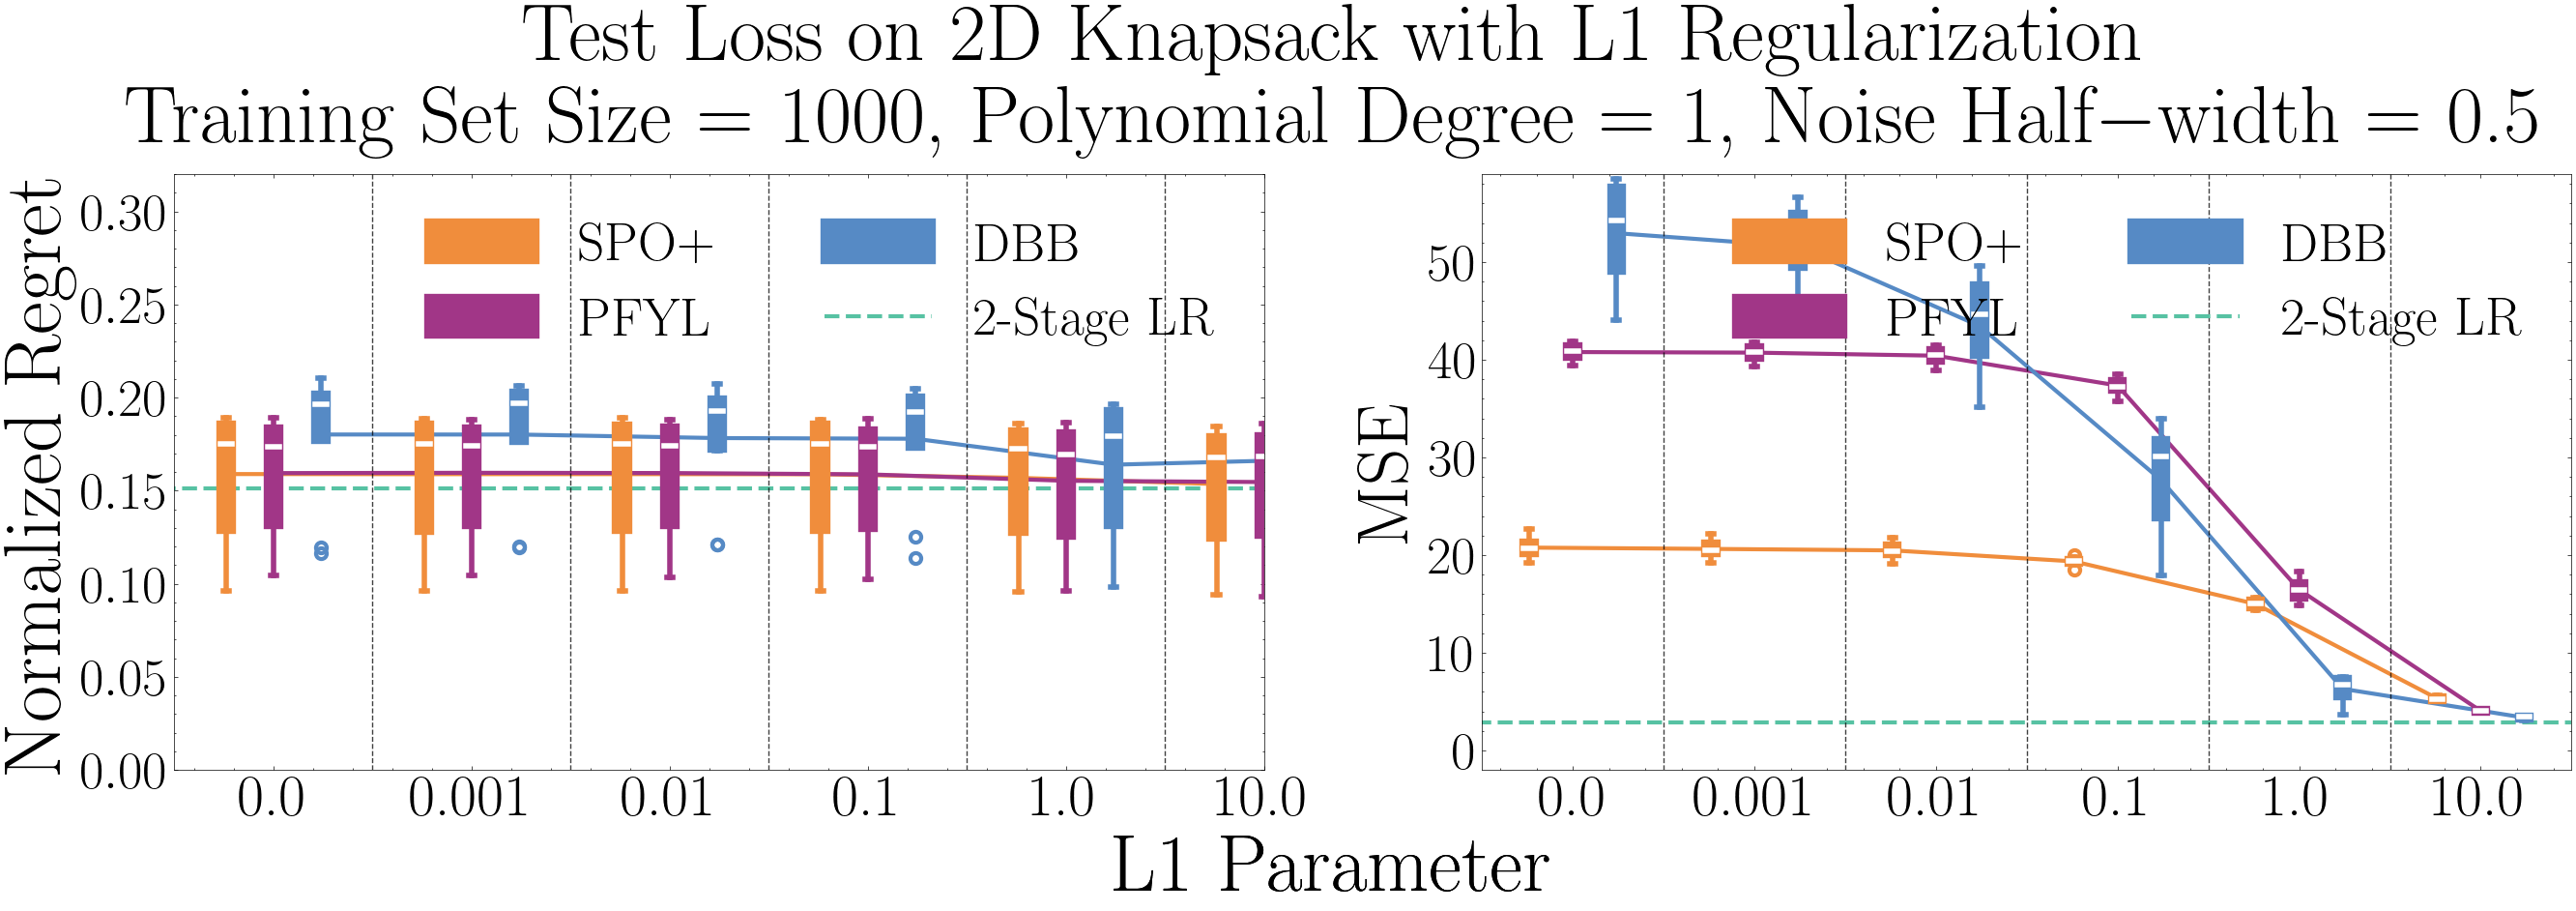

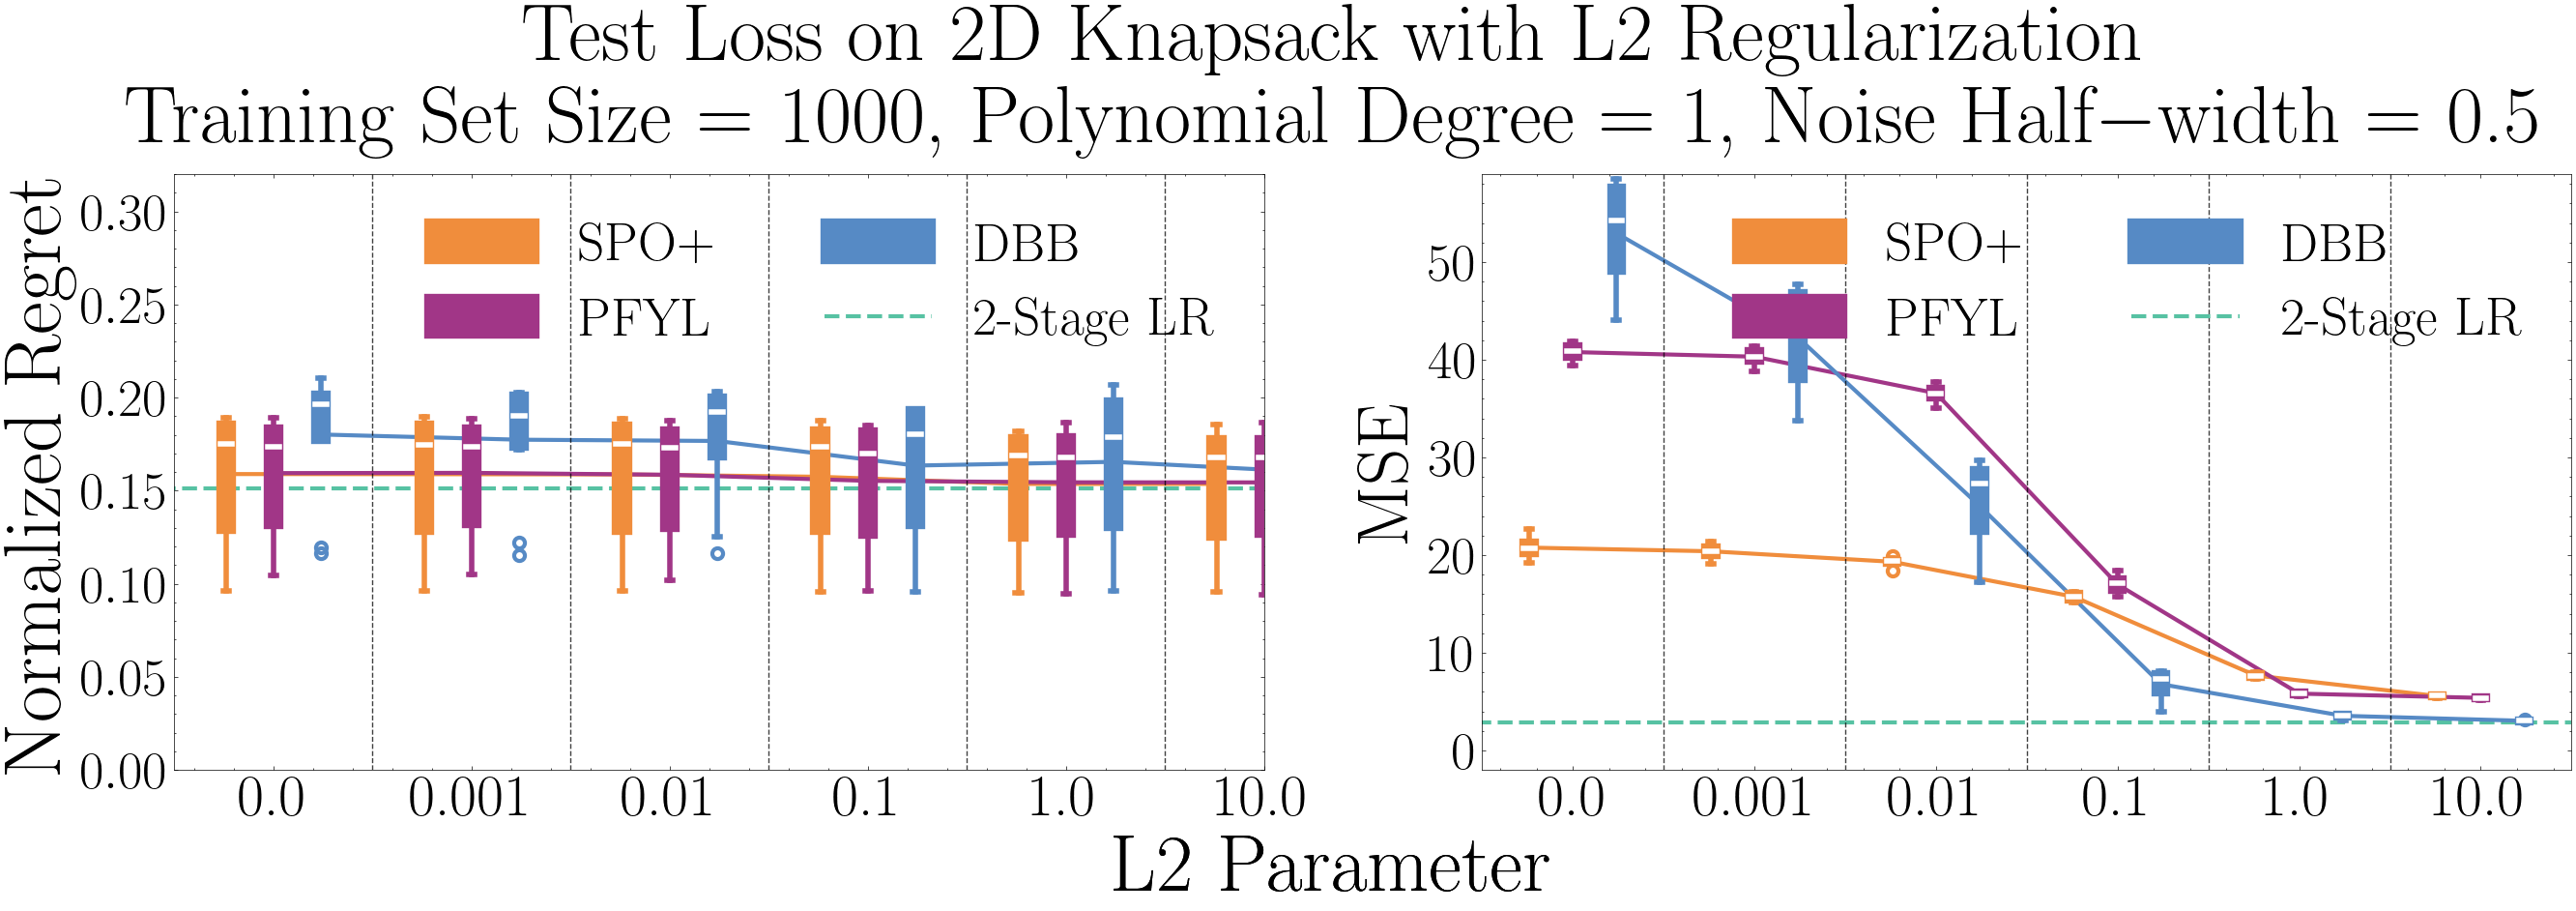

In [9]:
n = 1000
d = 1
e = 0.5
drawPlot(config, n, d, e, reg="l1")
drawPlot(config, n, d, e, reg="l2")

## Deg = 2 

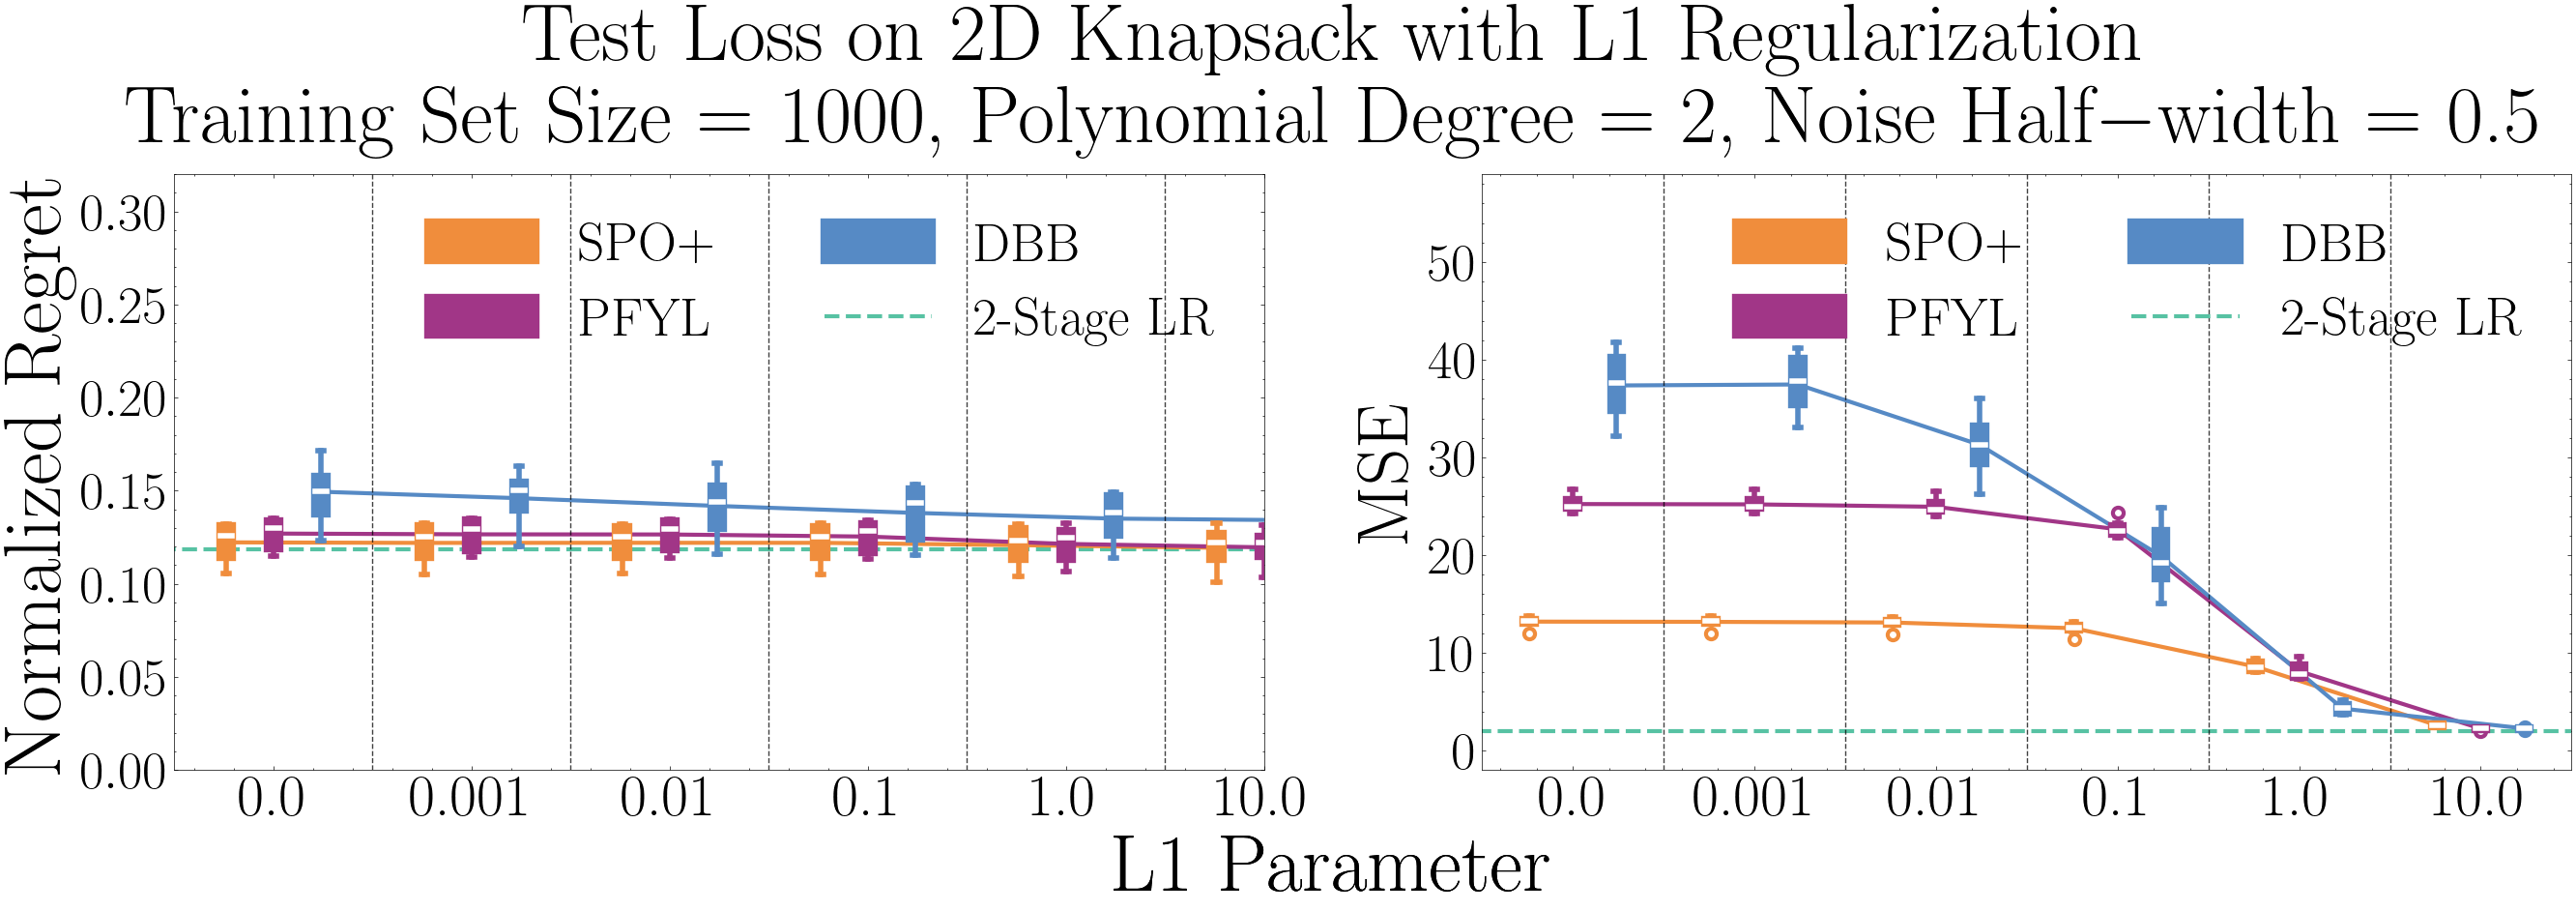

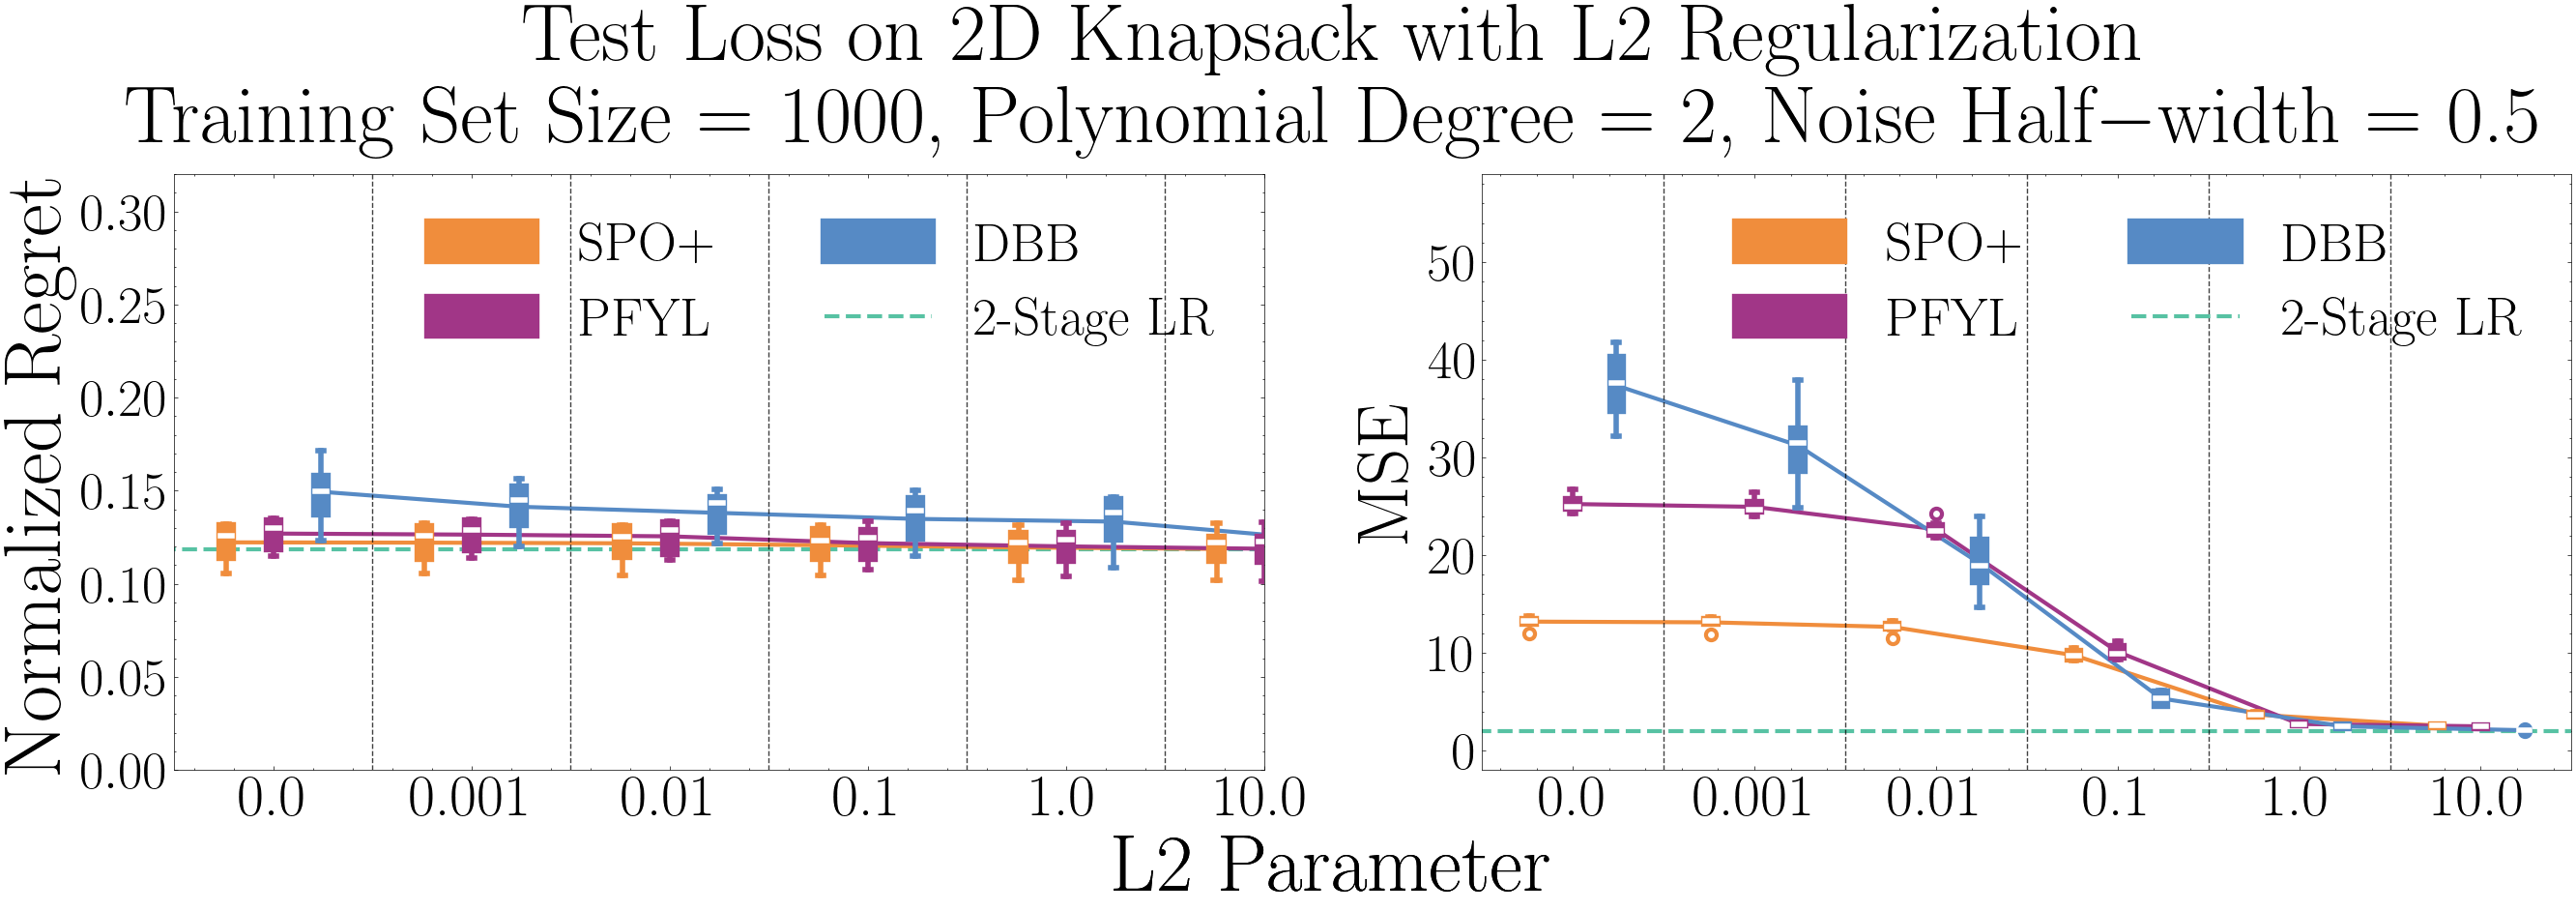

In [10]:
n = 1000
d = 2
e = 0.5
drawPlot(config, n, d, e, reg="l1")
drawPlot(config, n, d, e, reg="l2")

## Deg = 4 

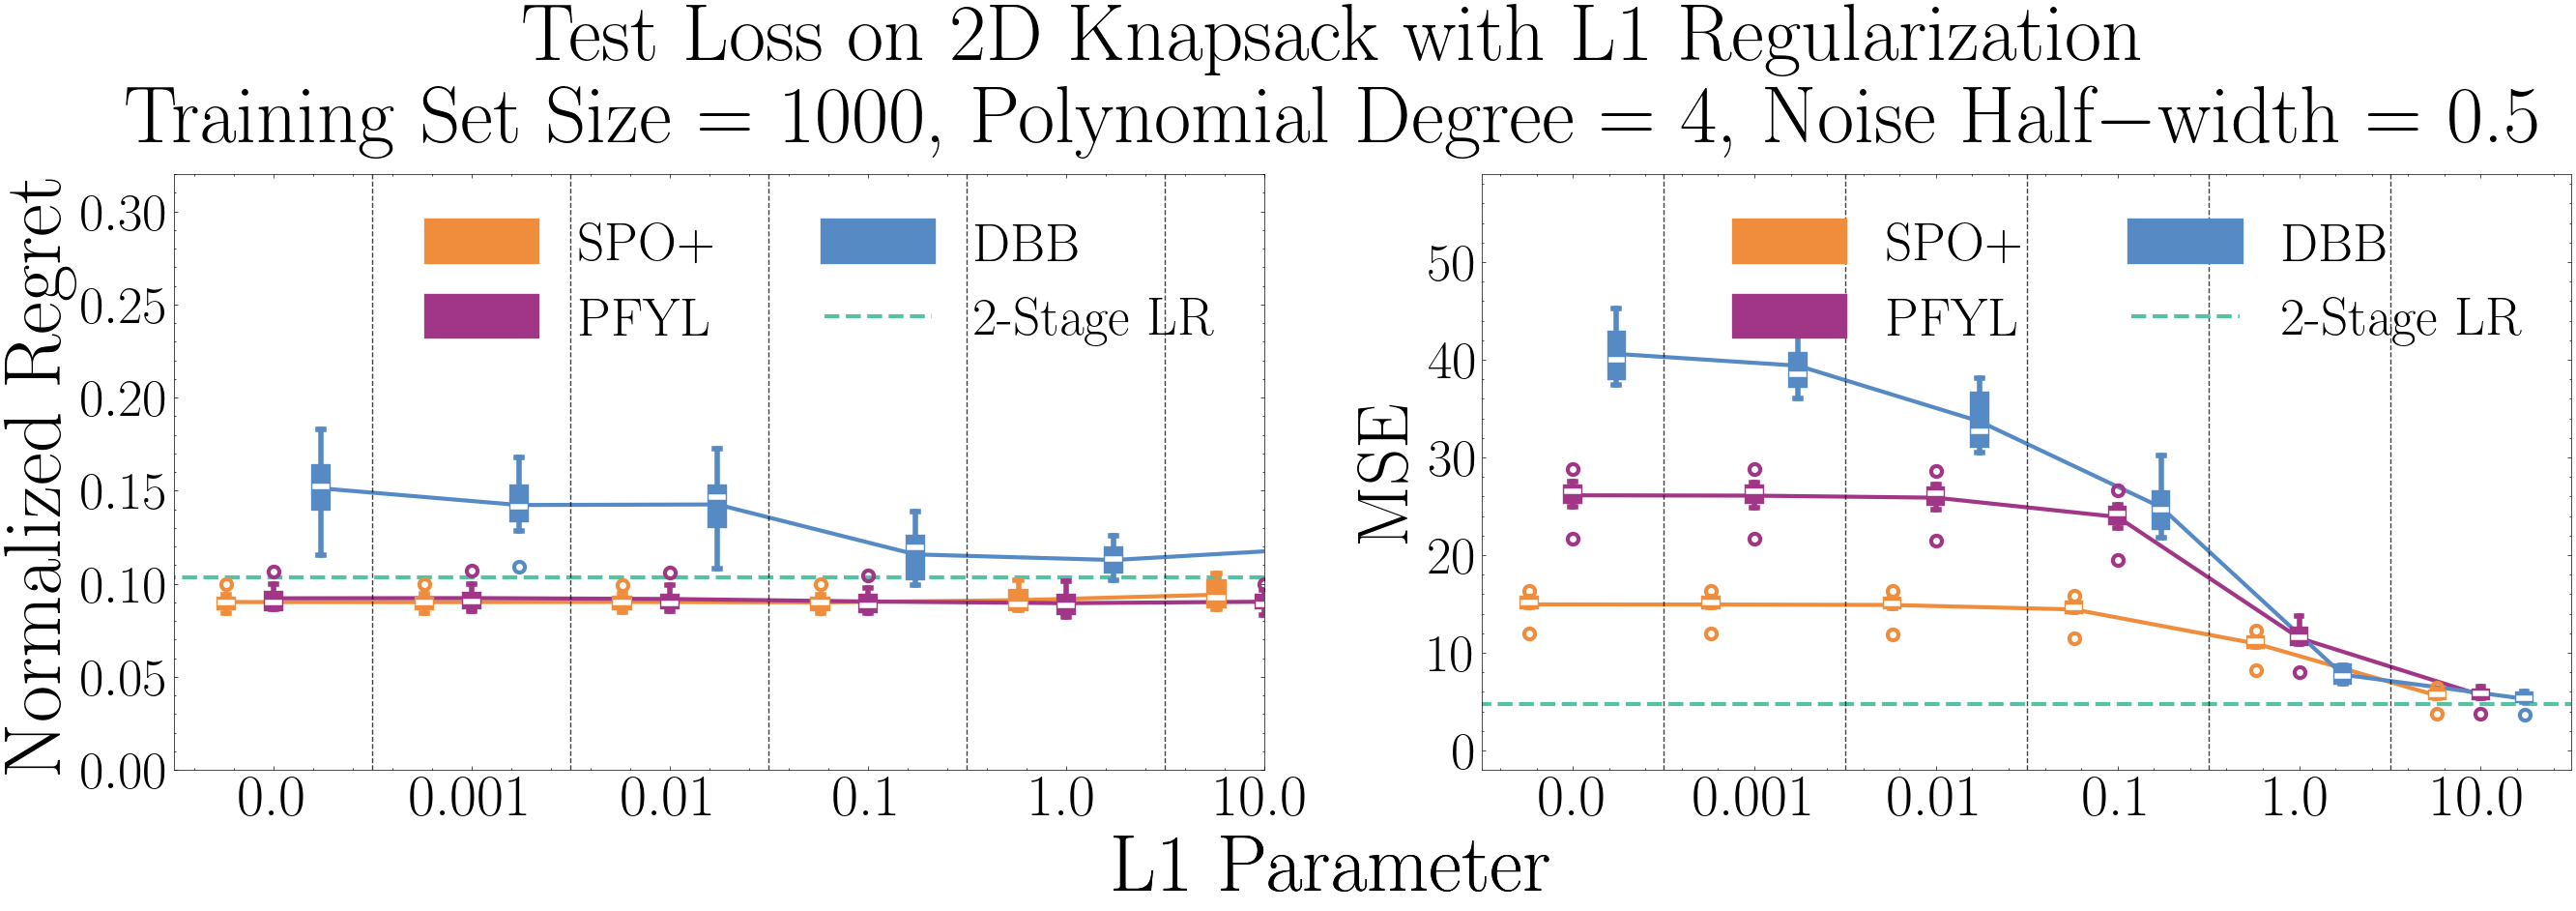

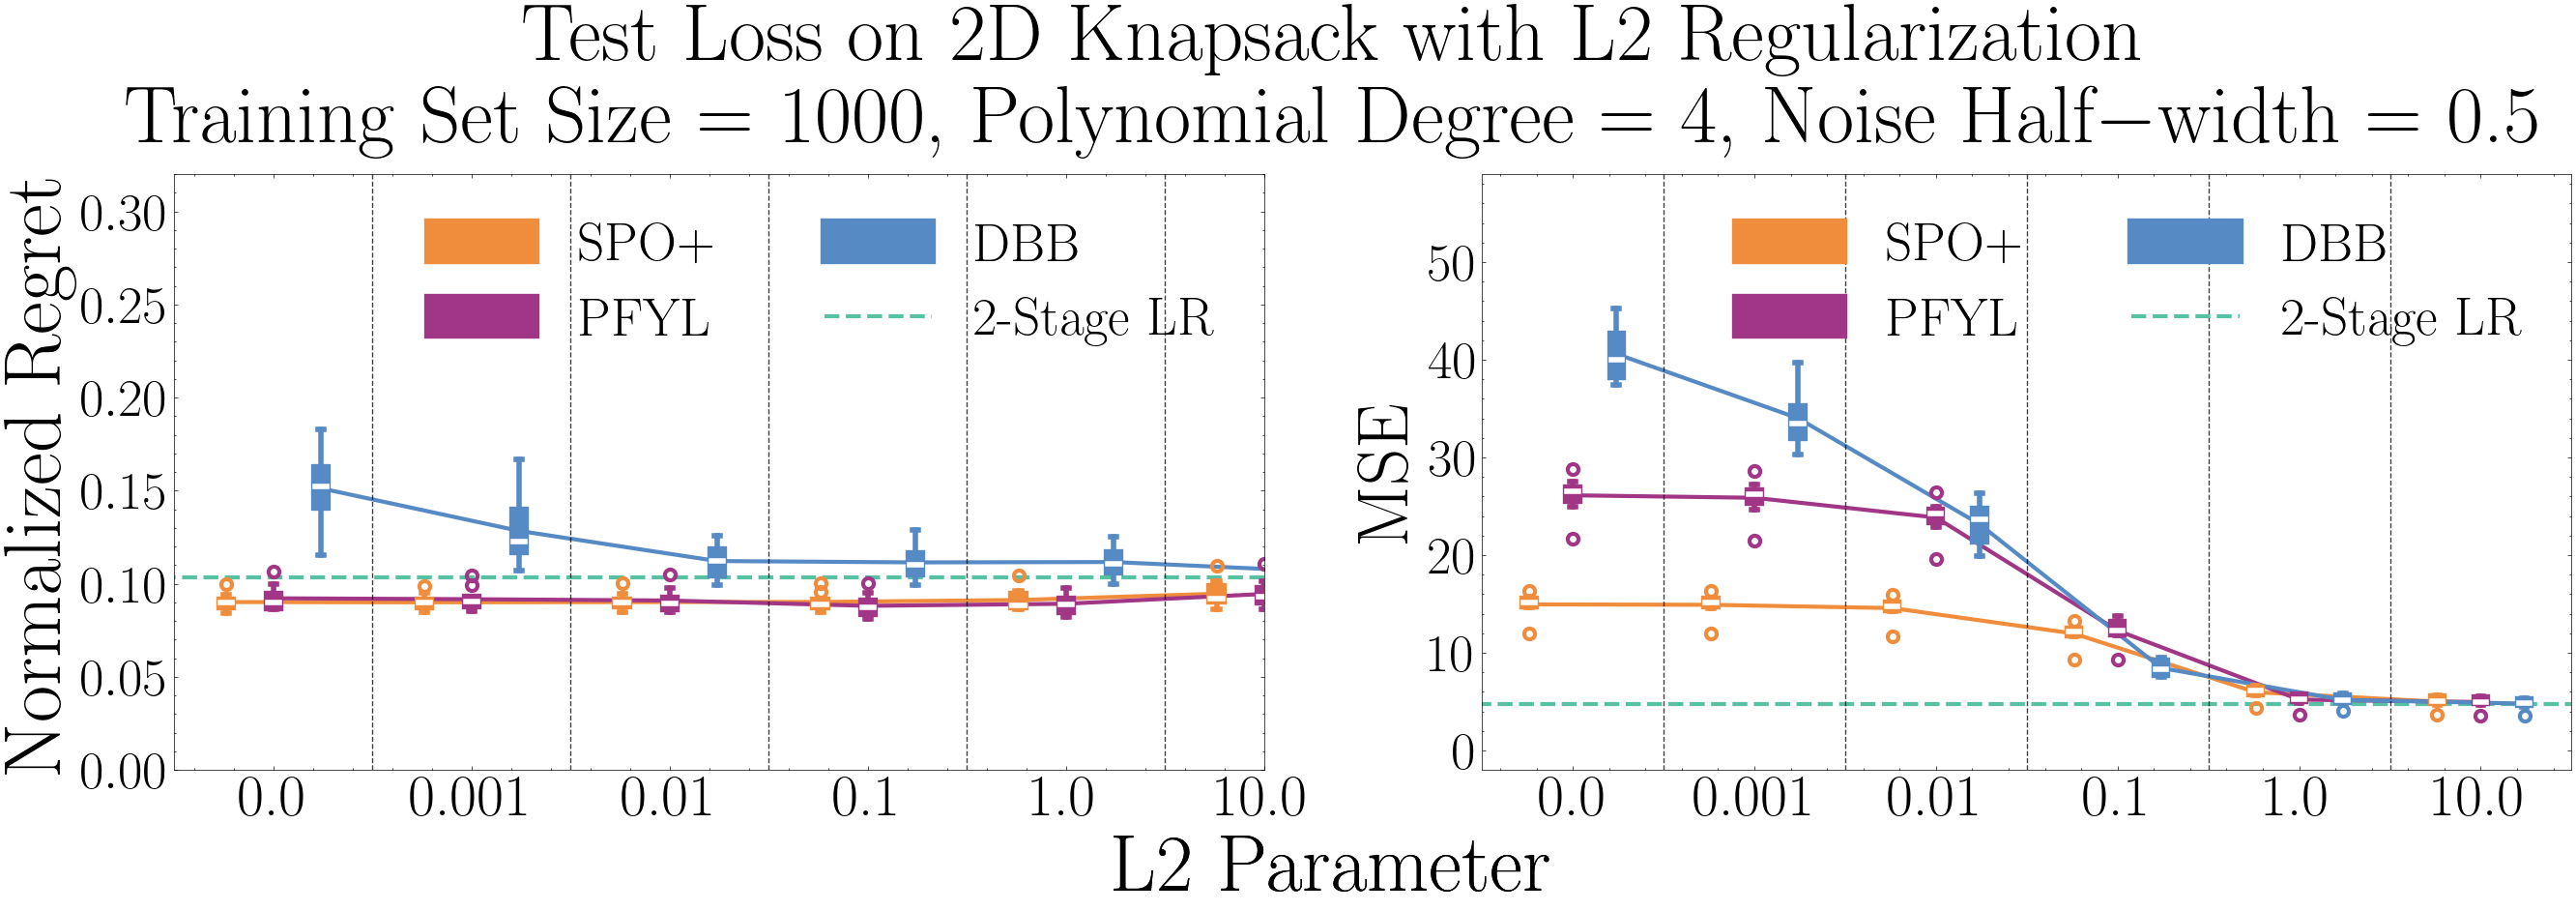

In [11]:
n = 1000
d = 4
e = 0.5
drawPlot(config, n, d, e, reg="l1")
drawPlot(config, n, d, e, reg="l2")

## Deg = 6

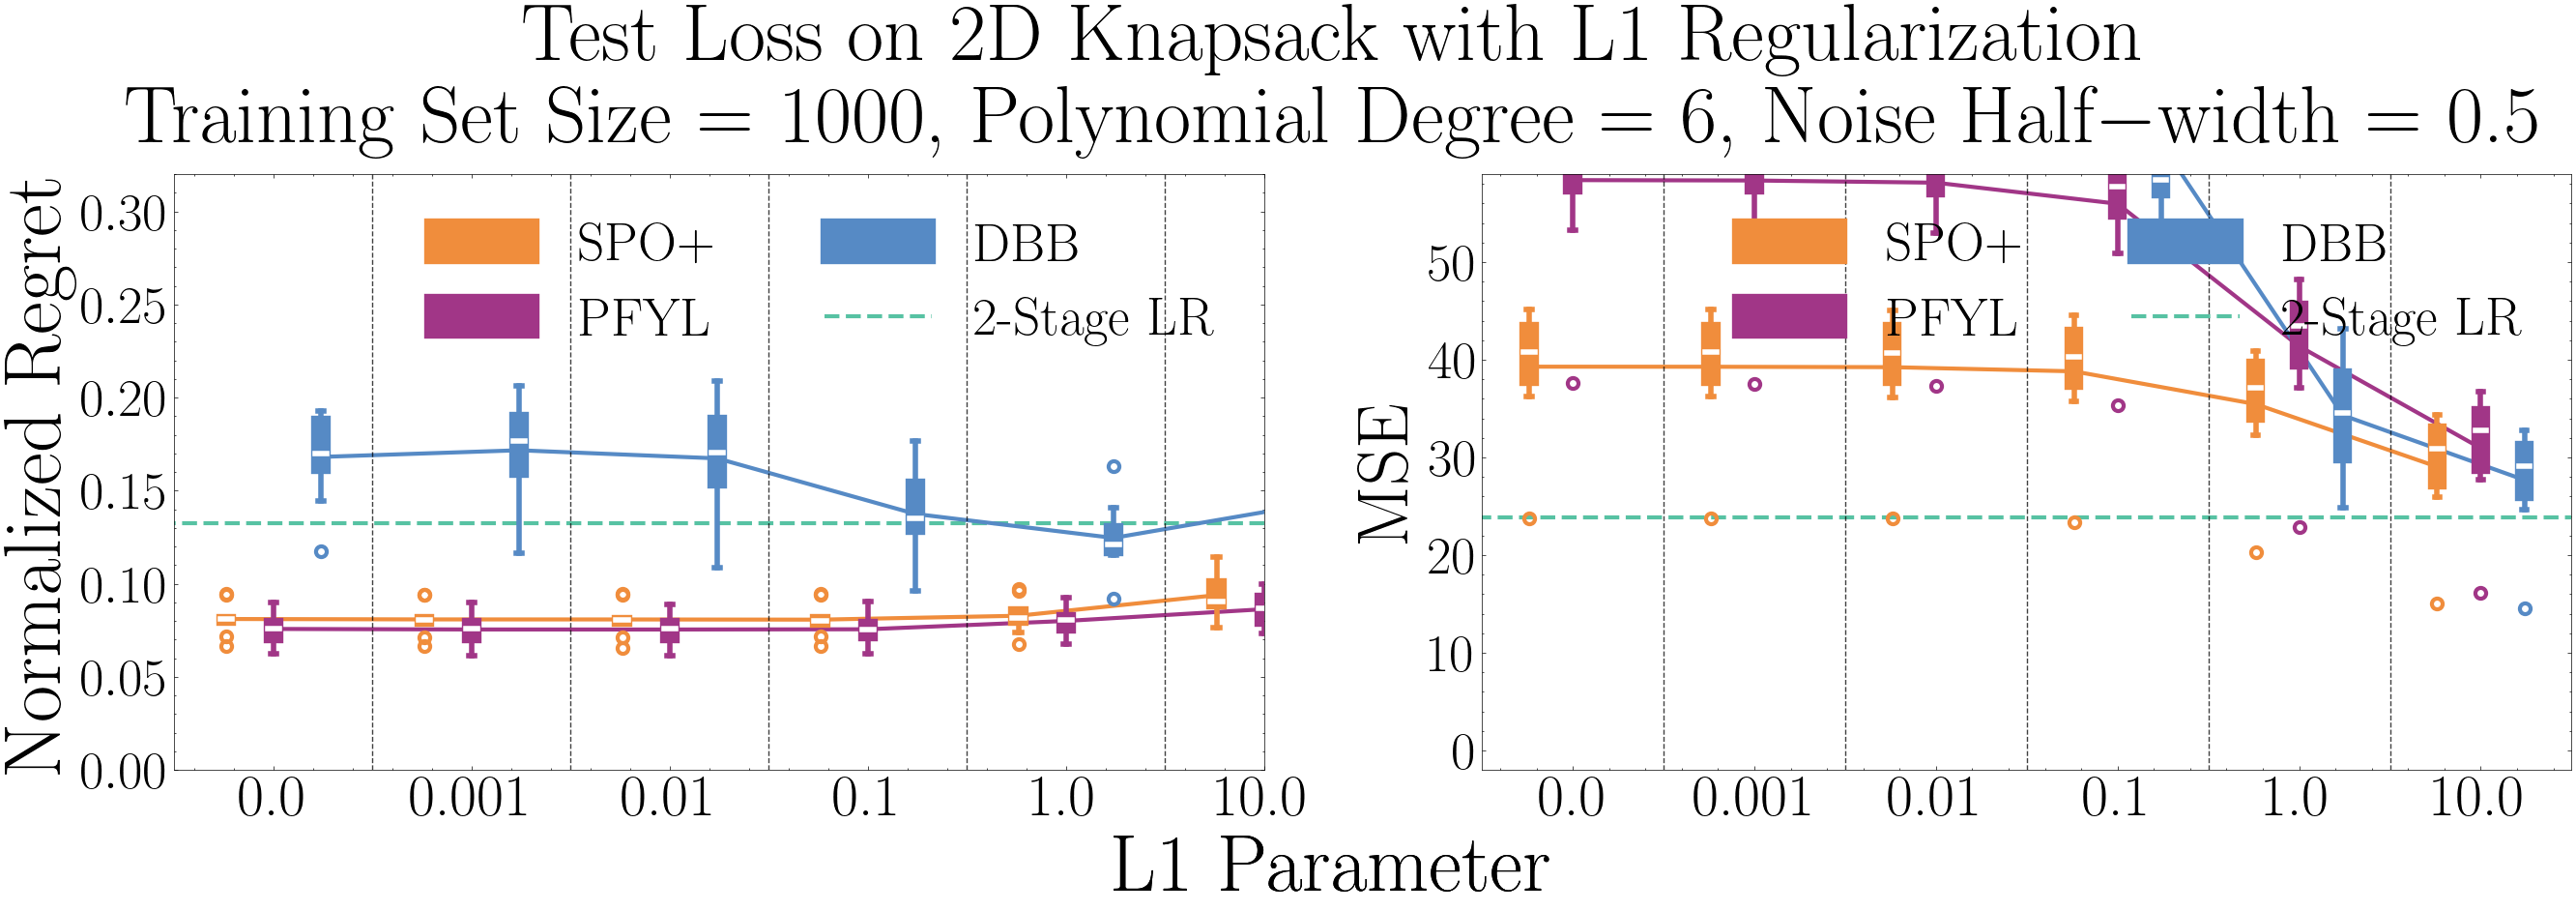

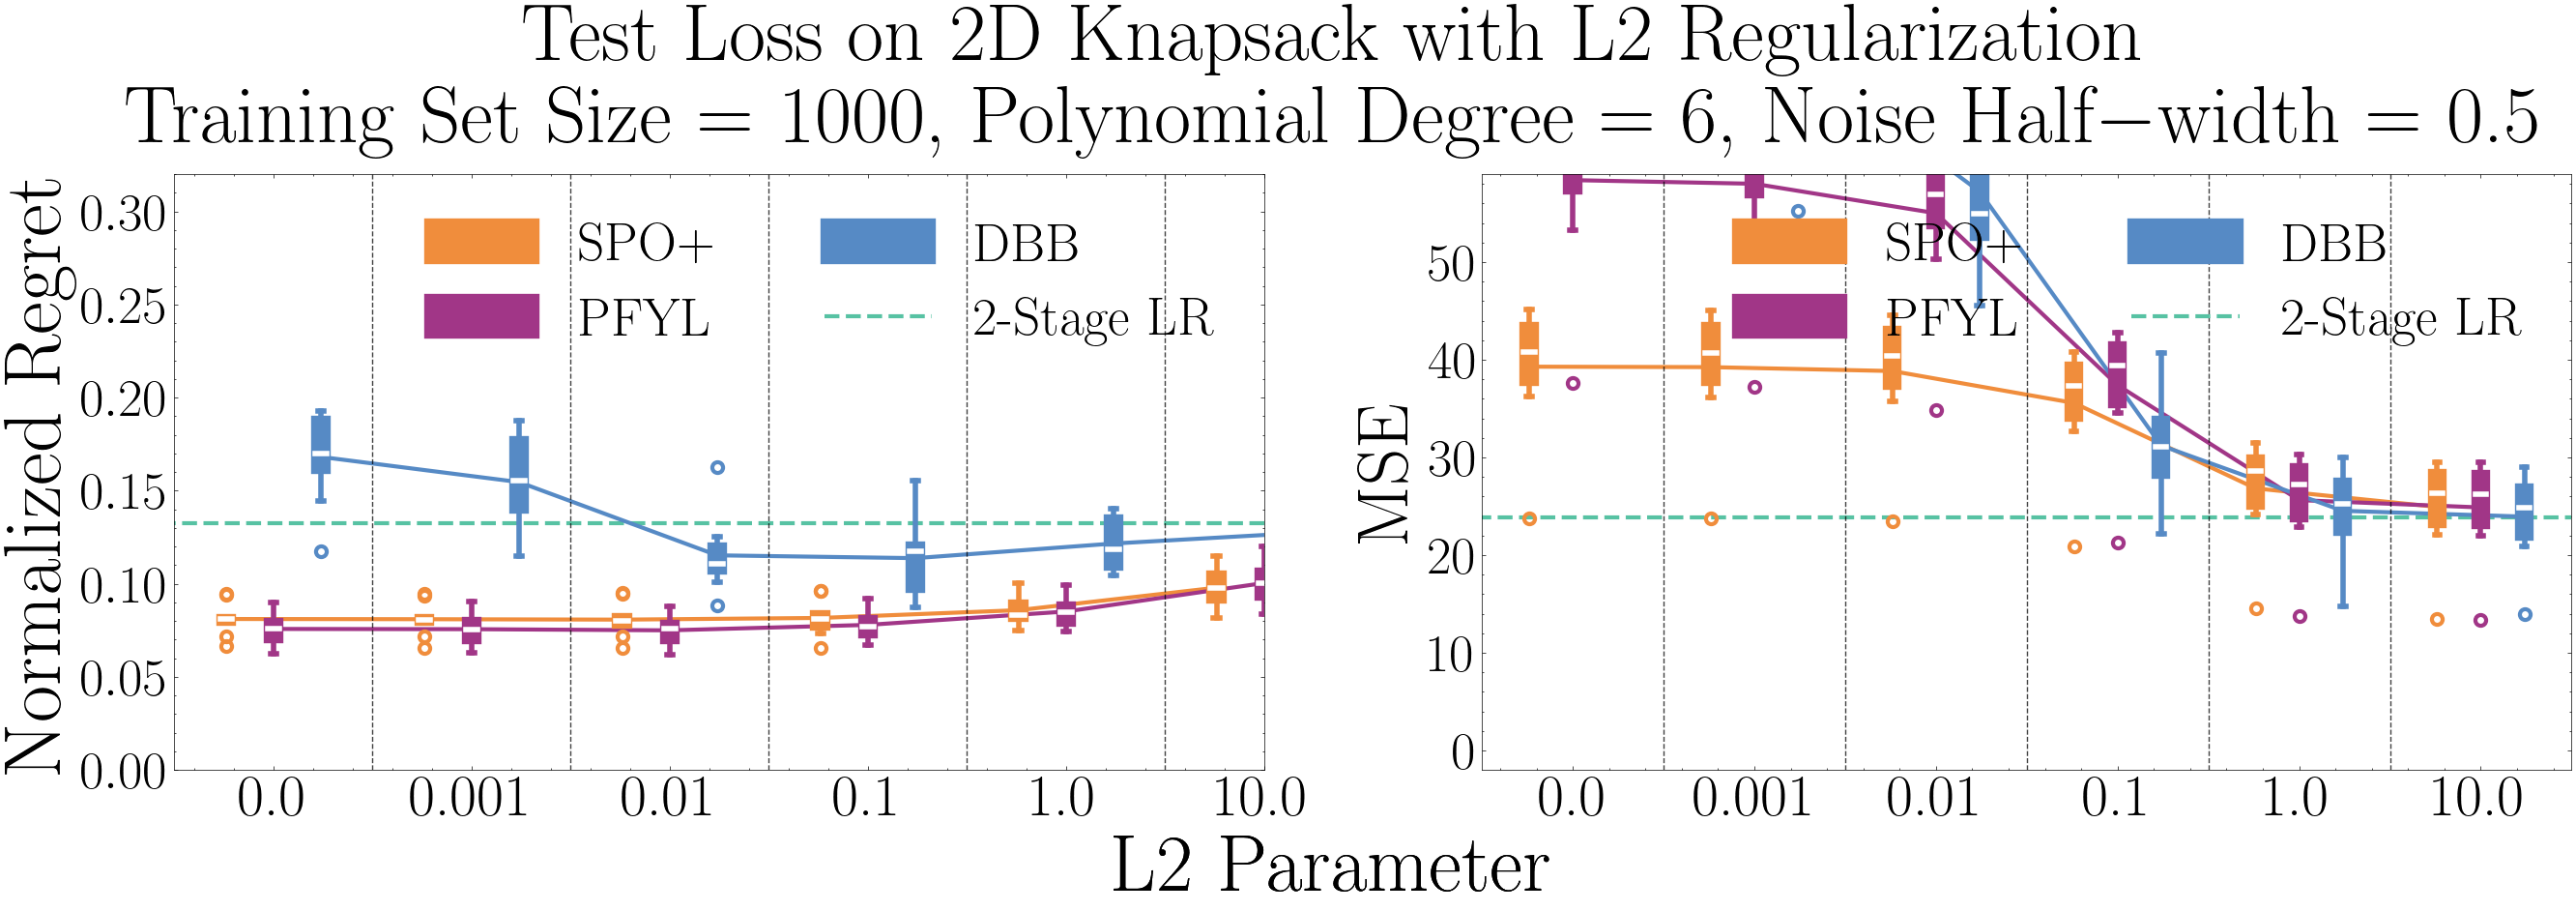

In [12]:
n = 1000
d = 6
e = 0.5
drawPlot(config, n, d, e, reg="l1")
drawPlot(config, n, d, e, reg="l2")